# Урок 2. Профилирование пользователей. Сегментация аудитории: unsupervised learning (clustering, LDA/ARTM), supervised (multi/binary classification)#

План занятия:

1. задача сегментации аудитории
2. тематическое моделирование - получаем эмбединги текстов
3. решаем задачу профилирования аудитории новостного портала

Рассматривать мы все будем в контексте решения конкретной прикладной задачи - задачи оттока

## Задача сегментации

<img src='https://drive.google.com/uc?export=view&id=1fH4dMvgSLT1u9nGc3DCxOI3YGJIkh5dj' width=600>

Разбиваем пользователей на группы, чем-то отличающиеся друг от друга.

Или же:

Сегментация клиентской базы — это способ повышения эффективности работы с пользователями путем их распределения по отдельным группам, или сегментам, в соответствии с их запросами и/или потребностями.

## Виды сегментации

### **1. когда совершил первую покупку (сколько прошло с момента регистрации до момента покупки)**

К примеру, есть сервис по заказу пиццы. Вначале пользователю нужно научиться пользоваться этим ПО, затем нужно сделать первый заказ, а затем пользователь может приходить всё реже и реже, а затем он нас покидает (из-за проблем в сервисе или из-за невкусной пиццы) - это нормальный живой цикл общения.

Это наблюдается в любой системе, где есть работа с клиентами.

Особенно, это известно маркетингу: сначала сотрудники помогают клиенту разобраться в продукте, затем они его поддерживают на пути пользования продуктом, а затем они общаются с ним, дабы клиент не ушел.


<img src='https://drive.google.com/uc?export=view&id=1wf6GFpfQNuxOGJ4xL0n4jb8hvVJjnTGF' width=600>

### **2. по психотипам**

Есть люди, которые делают покупки импульсивно, а есть те, которые всё тщательно обдумывают. И с ними нужно разговаривать по-разному.

<img src='https://drive.google.com/uc?export=view&id=1BRkfhmL1lwxOewbJvw46q8vZnPCAEqAp' width=600>

### **3. по платежам**

Интерес к покупателям, которые приходят к нам раз в год и платят по три копейки и к покупателям, которые приходят каждую неделю и оставляют по 100р, совершенно разный.

 <img src='https://drive.google.com/uc?export=view&id=1-ggaCJCNNV-XyFT2_tHfdjlmYefO85i4' width=800>

### **4. По эффективности взаимодействия (uplift)**

Актуально для телекома. 

Есть несколько групп клиентов:
1. Лояльные - совершают покупку и без нашего взаимодействия и с ним
2. Убеждаемые - совершат покупку только после нашего взаимодействия, без него не сделают покупку
3. Потерянные - не совершат покупку никогда, хоть мы им позвоним, хоть и не будем звонить
4. "не беспокоить" - совершат покупку, если мы их не будем тревожить, если потревожим, то потеряем покупателя.


<img src='https://drive.google.com/uc?export=view&id=1L0TJ8fK3YxuAzc52lz5SE2bgbwLBoS2J' width=500>

### **5. по интересам**

Пример: если человек искал, где купить десткое питание, то можем ему порекомендовать купить и памперсы.

<img src='https://drive.google.com/uc?export=view&id=1Ud1G7YC8eN8qxbCbidNhgd2e-EoEryfl' width=600>

Особенно выгодно профилировать пользователей по социальным сетям. Ведь любое действие и бездействие человека - это данные.
- Подписались на страницу
- Отписались от страницы
- Лайкнули новость
- Проигнорировали новость
- Добавили в избранное
- и т.д.

От этого контента зависят рекламные компании, которые настраиваются на определенную группу пользователей и на вас (а если точнее, не на вас самих, а на образ, который вы создаете в сети).

И еще куча вариантов сегментирования, которое может быть полезно. 

Для чего полезно?

1. понимание аудитории, способность описать основные группы пользователей и их интересы
2. выявление сегментов с максимальной монетизацией
3. выбор маркетинговой стратегии
4. налаживание эффективного взаимодействия с пользователями

## Пример (новостной портал)

Представим, что мы - компания-агрегатор новостей (новостной портал). И мы хотим построить модель прогнозирования оттока клиентов.

У нас есть:

1. читатели
2. новости

Для каждого пользователя мы можем за какой-то период (например, 1 день) достать из базы данных список прочитанных им новостей.

Для каждой новости мы можем вытащить текст и метаинформацию.


<img src='https://drive.google.com/uc?export=view&id=1OLrm1Rx9VjRVHbBW25Gi_mfUjY-WhB3p' width=700>

Нужно построить модель прогнозирования оттока. 


Нам нужны:

1. векторное представление пользователя
2. сегменты, описывающие интересы пользователя

p.s. в контексте нашей задачи - это одно и то же

Есть два очевидных варианта как это сделать:

1. многоклассовая классификация
    - **Проблема:**
    для классификации нам нужно сначала разметить новости - привлечение ручного труда
2. кластеризация документов с последующей попыткой их (кластера) интерпретировать

### Задача тематического моделирования (LDA)

LDA - Latent Dirichlet allocation

Терминология:

1. документ - коллекция слов 
2. тема - набор токенов (слов), совместно часто встречающихся в документах

- на свете бывают темы (заранее неизвестные), которые отражают то, о чём могут быть части документа;
- каждая тема – это распределение вероятностей на словах, т.е. мешок слов, из которого можно с разной вероятностью вытащить разные слова;

<img src='https://drive.google.com/uc?export=view&id=10hJ_zkUHDK1-hAYcdxUix5r9Wyaik9TA' width=500>


- каждый документ – это смесь тем, т.е. распределение вероятностей на темах, кубик, который можно кинуть *(тема искусства включает в себя не только слова балет и танцы, но и финансы, и кредиты)*; каждая тема в документе будет представлена в разных пропорциях (*если написал руководитель театра, то будет больше про танцы, а если написал министр культуры, то скорее про финансы, но везде говорим про искусство*)

<img src='https://drive.google.com/uc?export=view&id=1o7Bvl_2sscs3ldpxo4faqXCDIqTbkO8H' width=500>

- процесс порождения каждого слова состоит в том, чтобы сначала выбрать тему по распределению, соответствующему документу, а затем выбрать слово из распределения, соответствующего этой теме.

Предположим, что у нас есть несколько предложений:

1. I like to eat broccoli and bananas.
2. I ate a banana and spinach smoothie for breakfast.
3. Chinchillas and kittens are cute.
4. My sister adopted a kitten yesterday.
5. Look at this cute hamster munching on a piece of broccoli.

LDA - это метод для автоматического поиска тем, которые есть в предложениях. К примеру, если мы передадим эти предложения в модель и попросим найти 2 темы, то может получить что-то подобное:

- Предложения 1 и 2: 100% Topic A
- Предложения 3 и 4: 100% Topic B
- Предложение 5: 60% Topic A, 40% Topic B

<br>

- Topic A: 30% broccoli, 15% bananas, 10% breakfast, 10% munching, … (уже сейчас можем понять, что topic A о еде)
- Topic B: 20% chinchillas, 20% kittens, 20% cute, 15% hamster, … (topic B о милых животных)

Ну и конечно же вопрос, как LDA это делает?

Вероятностные модели удобно понимать и представлять в виде порождающих процессов (generative processes), когда мы последовательно описываем, как порождается одна единица данных, вводя по ходу дела все вероятностные предположения, которые мы в этой модели делаем. Соответственно, порождающий процесс для LDA должен последовательно описывать, как мы порождаем каждое слово каждого документа. И вот как это происходит:


0. Выбрать количество тем N
1. Случайно присвоить каждое слово в каждом документе к одной из N тем
    * *Заметьте, что это рандомное присвоение уже даёт распределение тем в документах и распределение слов во всех темах (но конечно не самого лучшего качества)*

2. Для каждого слова $w$ в документе $d$:
 * И для каждой темы $t$, посчитать две вероятности:
    * *предположить, что все присвоенные темы документы правильные за исключением одной, с которой работаем*
    1. $p(t|d)$ - Вероятность слов в документе, которые присвоены к теме
    2. $p(w|t)$ - Вероятность принадлежности слов из всех документов к теме $t$
 * Переопределить тему слова $w$, с помощью вероятности $p(t|d)*p(w|t)$ (опираясь на нашу модель, это вероятность того, что тема $t$ генерирует слово $w$)

3. В конечном счете достигнется стабильное состояние, когда присвоения имеют смысл.

Бросаем кубик, у которого столько сторон, сколько слов в словаре. Но определенные стороны кубика утяжеленные, то есть он будет чаще на них падать.

Например, если тема спорт, то слова "футбол", "вратарь", "мяч" будут попадаться гораздо чаще внутри этой темы.

<img src='https://drive.google.com/uc?export=view&id=1h4qc01naiyUZA0Q63bcv64ZnC2AKwbgp' width=600>

Таким образом, любой текст порождается из распределений, путем подбрасывания кубиков.

  ист. https://habr.com/ru/company/surfingbird/blog/230103/

1. условное распределение на множестве терминов, p(w|t). вероятность того, что слово w принадлежит теме t.
2. тематический профиль документа - условное распределение тем p(t|d). вероятность того, что тема t принадлежит документу d.
3. условное распределение слов в документах - p(w|d). вероятность, что слово w есть в документе d.


Тематическая модель позволяет нам получить p(w|t), p(t|d) по известным p(w|d)

<img src='https://drive.google.com/uc?export=view&id=1pd-ieIcQCF11xOwXbRt2v5Q1LRE2d1yV' width=600>

Когда начинаем решать задачу, то нам известно p(w|d). И нам не известно с какой вероятностью встречаются слова в темах и какие темы находятся в нашем документе и с какой вероятностью.
Есть проблема, что мы не знаем, какое количество тем есть в нашей задаче - это гиперпараметр.

### Переходим к практике


Вспомним, какие задачи перед нами стоят:
Основная - представление характеристик пользователя по списку статей, которые он читал.
1. Взять статьи и превратить их в темы.
2. Взять темы и превратить их в вектор, описывающий пользователя.


In [1]:
import pandas as pd

Наши новости

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR" -O articles.csv && rm -rf /tmp/cookies.txt 

--2022-05-22 11:07:30--  https://docs.google.com/uc?export=download&confirm=t&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR
Resolving docs.google.com (docs.google.com)... 142.250.145.101, 142.250.145.113, 142.250.145.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.145.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bl7pgq5cco1lmsredujflqm815srh6ev/1653217650000/14904333240138417226/*/1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR?e=download [following]
--2022-05-22 11:07:30--  https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bl7pgq5cco1lmsredujflqm815srh6ev/1653217650000/14904333240138417226/*/1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR?e=download
Resolving doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleusercontent.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to doc-0s-c0-docs.googleusercontent.com (doc-

In [3]:
news = pd.read_csv("articles.csv")
print(news.shape)
news.head(3)

(27000, 2)


,doc_id,title
0,6,Заместитель председателяnправительства РФnСерг...
1,4896,Матч 1/16 финала Кубка России по футболу был п...
2,4897,Форвард «Авангарда» Томаш Заборский прокоммент...


In [4]:
news.iloc[0]['title']

'Заместитель председателяnправительства РФnСергейnИвановnизбран председателем советаnПБК ЦСКАn. Как сообщаетnпресс-службаnармейцев, такое решение было единогласно принято на первом заседании совета клуба. Основной функцией этого органа будет обсуждение текущего состояния, планирование и утверждение стратегии развития клуба на ближайшую перспективу.nnВ состав совета вошли:nГеоргий Полтавченкоn(полномочный представитель президента в Центральном федеральном округе),nАлексей Седовn(генерал-полковник, начальник службы по защите конституционного строя и борьбе с терроризмомnФСБ РФn),nАлександр Новакn(заместитель министра финансов РФ),nВячеслав Полтавцевn(заместитель генерального директора, руководитель блока по взаимодействию с органами власти, социальной и корпоративной политикиnГМК «Норильский никель»n),nЛеонид Исаковичn(генеральный директор ООО «УК «Спортивные проекты»),nОльга Плешаковаn(генеральный директорn«Трансаэро»n),nАлександр Провоторовn, (генеральный директорnОАО «Ростелеком»n), А

In [5]:
!wget 'https://drive.google.com/uc?export=download&id=1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a' -O users_articles.csv

--2022-05-22 11:07:33--  https://drive.google.com/uc?export=download&id=1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a
Resolving drive.google.com (drive.google.com)... 173.194.79.113, 173.194.79.139, 173.194.79.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a55to3o48fe9ancjubgrqlapbm36il1c/1653217650000/14904333240138417226/*/1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a?e=download [following]
--2022-05-22 11:07:33--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a55to3o48fe9ancjubgrqlapbm36il1c/1653217650000/14904333240138417226/*/1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a?e=download
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to doc-04-c0-docs.googleusercontent.com (doc-04-c0-doc

Загрузим пользователей и списки последних прочитанных новостей

In [6]:
users = pd.read_csv("users_articles.csv")
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


Итак, нам нужно получить векторные представления пользователей на основе прочитанным ими новостей и самих новостей

### 1. Получаем векторные представления новостей

**ПОЗАВТРАКАЛИ**

Стемминг (убираем лишнии куски слова):
**завтрак**<br>
Очень быстро, очень дешево и очень слабо.

Лемматизация (перевод в неопределенную форму для гл. и в им.падеж для сущ.):
**позавтракать**<br>
Небыстро, сложно.

In [7]:
!pip install razdel pymorphy2 pyLDAvis

In [8]:
# предобработка текстов
import re
import numpy as np
from gensim.corpora.dictionary import Dictionary
from razdel import tokenize  # сегментация русскоязычного текста на токены и предложения https://github.com/natasha/razdel
import pymorphy2  # Морфологический анализатор

Не все слова равны, не все слова одинаково работают. К примеру, союзы и предлоги в нашей задачи никак не помогут, поэтому можем их выкидывать. (*Но в задачах оценки стиля, к примеру, такие слова будут очень полезны*)

In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stopword_ru = stopwords.words('russian')
print(len(stopword_ru))

151


In [11]:
stopword_ru[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [12]:
!wget 'https://drive.google.com/uc?export=download&id=17wVn5YPpMjHToctGgff_KfSeWcIIlf7c' -O stopwords.txt

--2022-05-22 11:07:40--  https://drive.google.com/uc?export=download&id=17wVn5YPpMjHToctGgff_KfSeWcIIlf7c
Resolving drive.google.com (drive.google.com)... 173.194.79.139, 173.194.79.138, 173.194.79.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fmec3el2f3rdvglkduer2ieqjf4orreb/1653217650000/14904333240138417226/*/17wVn5YPpMjHToctGgff_KfSeWcIIlf7c?e=download [following]
--2022-05-22 11:07:40--  https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fmec3el2f3rdvglkduer2ieqjf4orreb/1653217650000/14904333240138417226/*/17wVn5YPpMjHToctGgff_KfSeWcIIlf7c?e=download
Resolving doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleusercontent.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-doc

In [13]:
with open('stopwords.txt') as f:
    additional_stopwords = [w.strip() for w in f.readlines() if w]
    
stopword_ru += additional_stopwords
len(stopword_ru)

776

In [14]:
stopword_ru[200:210]

['ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам']

In [15]:
def clean_text(text):
    '''
    очистка текста
    
    на выходе очищеный текст
    '''
    if not isinstance(text, str):
        text = str(text)
    
    text = text.lower()
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    text = re.sub('n', ' ', text)
    
    return text

cache = {}
morph = pymorphy2.MorphAnalyzer()

def lemmatization(text):    
    '''
    лемматизация
        [0] если зашел тип не `str` делаем его `str`
        [1] токенизация предложения через razdel
        [2] проверка есть ли в начале слова '-'
        [3] проверка токена с одного символа
        [4] проверка есть ли данное слово в кэше
        [5] лемматизация слова
        [6] проверка на стоп-слова

    на выходе лист лемматизированых токенов
    '''

    # [0]
    if not isinstance(text, str):
        text = str(text)
    
    # [1]
    tokens = list(tokenize(text))
    words = [_.text for _ in tokens]

    words_lem = []
    for w in words:
        if w[0] == '-': # [2]
            w = w[1:]
        if len(w) > 1: # [3]
            if w in cache: # [4]
                words_lem.append(cache[w])
            else: # [5]
                temp_cach = cache[w] = morph.parse(w)[0].normal_form
                words_lem.append(temp_cach)
    
    words_lem_without_stopwords = [i for i in words_lem if not i in stopword_ru] # [6]
    
    return words_lem_without_stopwords

In [16]:
morph = pymorphy2.MorphAnalyzer()
morph.parse('сбегали')[0].normal_form

'сбегать'

In [17]:
news['title'].iloc[:2].apply(lambda x: clean_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Possible nested set at position 39
  


0    заместитель председателя правительства рф серг...
1    матч  финала кубка россии по футболу был приос...
Name: title, dtype: object

In [18]:
%%time
from tqdm import tqdm
tqdm.pandas()

# Запускаем очистку текста. Будет долго...
news['title'] = news['title'].progress_apply(lambda x: clean_text(x))

100%|██████████| 27000/27000 [00:38<00:00, 707.57it/s] 

CPU times: user 29.5 s, sys: 1.78 s, total: 31.3 s
Wall time: 38.2 s


In [19]:
news['title'].iloc[:10]

0    заместитель председателя правительства рф серг...
1    матч  финала кубка россии по футболу был приос...
2    форвард авангарда томаш заборский прокомментир...
3    главный тренер кубани юрий красножан прокоммен...
4    решением попечительского совета владивостокско...
5    ио главного тренера вячеслав буцаев прокоммент...
6    запорожский металлург дома потерпел разгромное...
7    сборная сша одержала победу над австрией со сч...
8    бывший защитник сборной россии дарюс каспарайт...
9    полузащитник цска зоран тошич после победы над...
Name: title, dtype: object

In [20]:
news['title'].iloc[:2].apply(lambda x: lemmatization(x))

0    [заместитель, председатель, правительство, рф,...
1    [матч, финал, кубок, россия, футбол, приостано...
Name: title, dtype: object

In [21]:
%%time
# Запускаем лемматизацию текста. Будет очень долго...
news['title'] = news['title'].progress_apply(lambda x: lemmatization(x))

100%|██████████| 27000/27000 [03:53<00:00, 115.74it/s]

CPU times: user 3min 50s, sys: 2.07 s, total: 3min 52s
Wall time: 3min 53s


А теперь в 3 строчки обучим нашу модель

In [22]:
# сформируем список наших текстов
texts = list(news['title'].values)

# Создадим корпус из списка с текстами
common_dictionary = Dictionary(texts)
common_corpus = [common_dictionary.doc2bow(text) for text in texts]

Что такое common_dictionary и как он выглядит

In [23]:
len(common_dictionary)

135645

In [24]:
common_dictionary[4]

'банк'

In [25]:
# common_dictionary.id2token

In [26]:
common_dictionary.doc2bow(['коллега', 'пошел', 'пить', 'чай'], allow_update=True)

[(993, 1), (6129, 1), (12270, 1), (135645, 1)]

Все просто - это словарь наших слов

Запускаем обучение

In [27]:
N_topic = 20

In [28]:
%%time
from gensim.models import LdaModel

# Обучаем модель на корпусе
lda = LdaModel(common_corpus, num_topics=N_topic, id2word=common_dictionary)#, passes=10)

CPU times: user 38.2 s, sys: 17.7 s, total: 56 s
Wall time: 36 s


In [29]:
from gensim.test.utils import datapath

# Сохраняем модель на диск
temp_file = datapath("model.lda")
lda.save(temp_file)

In [30]:
# Загружаем обученную модель с диска
lda = LdaModel.load(temp_file)

In [31]:
# Создаем новый корпус документов, которые раньше не видели
other_texts = list(news['title'].iloc[:3])
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[2]
print(other_texts[2])
lda[unseen_doc] 

['форвард', 'авангард', 'томаш', 'заборский', 'прокомментировать', 'игра', 'команда', 'матч', 'чемпионат', 'кхл', 'против', 'атланта', 'плохой', 'матч', 'нижний', 'новгород', 'против', 'торпедо', 'настраиваться', 'первый', 'минута', 'включиться', 'заборский', 'получиться', 'забросить', 'быстрый', 'гол', 'задать', 'хороший', 'темп', 'поединок', 'играть', 'хороший', 'сторона', 'пять', 'очко', 'выезд', 'девять', 'хороший']


[(3, 0.48434561),
 (4, 0.07617329),
 (12, 0.07085488),
 (16, 0.034301907),
 (17, 0.10764344),
 (18, 0.20918088)]

Обучили модель. Теперь 2 вопроса:

1. как выглядят наши темы
2. как получить для документа вектор значений (вероятности принадлежности каждой теме)

In [32]:
x = lda.show_topics(num_topics=N_topic, num_words=7, formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

# Печатаем только слова
for topic, words in topics_words:
    print(f"topic_{topic}: " + " ".join(words))

topic_0: ракета полёт американский первый орбита планета запуск
topic_1: власть россия сша нефть американский закон рф
topic_2: производитель asa px спрос затмение погода одежда
topic_3: всё очень большой первый ребёнок хороший история
topic_4: россия украина газ российский проект система эксперт
topic_5: мужчина женщина убийство задержать расследование следствие сотрудник
topic_6: земля ребёнок погибнуть животное обнаружить день миссия
topic_7: учёный исследование научный исследователь самолёт территория станция
topic_8: млрд банк санкция область министерство правительство россия
topic_9: млн руб банк рубль цена исследование составить
topic_10: восток болезнь ген ветер луна древний жизнь
topic_11: россия российский путин владимир сша совет глава
topic_12: фестиваль сайт открытие мероприятие проект участник программа
topic_13: рост фонд рубль тыс уровень развитие доход
topic_14: район операция турист граница республика сша пострадать
topic_15: источник взрыв эксперимент ru рейс газета 

Очень неплохо - большинство тем вполне можно описать о чем они

Давайте напишем функцию, которая будет нам возвращать векторное представление новости

In [33]:
def get_lda_vector(lda, text):
    unseen_doc = common_dictionary.doc2bow(text)
    lda_tuple = lda[unseen_doc]

    not_null_topics = dict(zip([i[0] for i in lda_tuple], [i[1] for i in lda_tuple]))

    output_vector = []
    for i in range(N_topic):
        if i not in not_null_topics:
            output_vector.append(0)
        else:
            output_vector.append(not_null_topics[i])
    return np.array(output_vector)

In [34]:
get_lda_vector(lda, news['title'].iloc[0])

array([0.        , 0.        , 0.        , 0.07201403, 0.        ,
       0.        , 0.        , 0.        , 0.73910195, 0.01193283,
       0.        , 0.14605191, 0.02432036, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [35]:
%%time
topic_matrix = pd.DataFrame([get_lda_vector(lda, text) for text in news['title'].values])
topic_matrix.columns = [f'topic_{i}' for i in range(N_topic)]
topic_matrix['doc_id'] = news['doc_id'].values
topic_matrix = topic_matrix[['doc_id']+[f'topic_{i}' for i in range(N_topic)]]
topic_matrix.head(5)

CPU times: user 31.9 s, sys: 16.5 s, total: 48.4 s
Wall time: 30.2 s


In [36]:
topic_matrix.head()

,doc_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,6,0.0,0.0,0.0,0.072009,0.000000,0.0,0.0,0.0,0.7391,...,0.0,0.146048,0.024332,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,4896,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,...,0.0,0.000000,0.173242,0.0,0.000000,0.804807,0.000000,0.000000,0.000000,0.0
2,4897,0.0,0.0,0.0,0.484342,0.076173,0.0,0.0,0.0,0.0000,...,0.0,0.000000,0.070860,0.0,0.000000,0.000000,0.034302,0.107642,0.209181,0.0
3,4898,0.0,0.0,0.0,0.476100,0.512924,0.0,0.0,0.0,0.0000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,4899,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,...,0.0,0.245307,0.116940,0.0,0.614781,0.000000,0.000000,0.000000,0.000000,0.0


Прекрасно, мы получили вектора наших новостей! И даже умеем интерпретировать получившиеся темы.

Можно двигаться далее

### Следующий шаг - векторные представления пользователей

In [37]:
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


In [38]:
doc_dict = dict(zip(topic_matrix['doc_id'].values, topic_matrix[[f'topic_{i}' for i in range(N_topic)]].values))

In [39]:
doc_dict[293672]

array([0.        , 0.        , 0.        , 0.03226748, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.2126891 ,
       0.        , 0.07359204, 0.38817436, 0.16160217, 0.        ,
       0.        , 0.        , 0.        , 0.11767485, 0.        ])

In [40]:
def get_user_embedding(user_articles_list, doc_dict):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    # print(user_vector)
    user_vector = np.mean(user_vector, 0)  # можно не среднее
    return user_vector

In [41]:
user_articles_list = users['articles'].iloc[33]

get_user_embedding(user_articles_list, doc_dict)

array([0.03481969, 0.25237128, 0.        , 0.03114826, 0.10158385,
       0.09753449, 0.0185748 , 0.00937434, 0.04807315, 0.00650752,
       0.01742375, 0.15267482, 0.00215139, 0.03199635, 0.06638923,
       0.        , 0.00570688, 0.00186766, 0.10869045, 0.00202864])

Теперь получим эмбединги для всех пользователей и проверим их качество на конкретной downstream-задаче

In [42]:
%%time
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x, doc_dict))])
user_embeddings.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings.head(3)

CPU times: user 309 ms, sys: 9.75 ms, total: 319 ms
Wall time: 320 ms


In [43]:
user_embeddings.head()

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,u105138,0.000000,0.155181,0.014989,0.033830,0.027077,0.019254,0.052835,0.009451,0.048108,...,0.037081,0.071502,0.115652,0.070864,0.091043,0.042067,0.055267,0.021529,0.019612,0.019810
1,u108690,0.000000,0.189112,0.028406,0.038771,0.125174,0.050918,0.023440,0.027459,0.049605,...,0.012010,0.128455,0.002346,0.096880,0.054561,0.081157,0.030599,0.009017,0.007008,0.014518
2,u108339,0.006188,0.275030,0.003110,0.007531,0.041866,0.093719,0.051517,0.008303,0.084790,...,0.013987,0.042843,0.009972,0.021410,0.156808,0.057937,0.044333,0.002132,0.023043,0.010883
3,u101138,0.030538,0.019643,0.009157,0.239532,0.048597,0.019528,0.076000,0.016029,0.004853,...,0.000000,0.102345,0.050551,0.035563,0.010107,0.029572,0.000000,0.240218,0.034819,0.020681
4,u108248,0.013056,0.098451,0.028372,0.064283,0.063617,0.019231,0.128717,0.017785,0.017551,...,0.042665,0.145138,0.011648,0.032485,0.113121,0.048351,0.043653,0.000000,0.016180,0.035159


Датасет готов - можно попробовать обучить модель. Загрузим нашу разметку

In [44]:
!wget 'https://drive.google.com/uc?export=download&id=1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK' -O users_churn.csv

--2022-05-22 11:13:35--  https://drive.google.com/uc?export=download&id=1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK
Resolving drive.google.com (drive.google.com)... 173.194.69.101, 173.194.69.138, 173.194.69.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.69.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6utanr5kulv2reiodcig14pq515jgfbn/1653217950000/14904333240138417226/*/1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK?e=download [following]
--2022-05-22 11:13:36--  https://doc-0k-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6utanr5kulv2reiodcig14pq515jgfbn/1653217950000/14904333240138417226/*/1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK?e=download
Resolving doc-0k-c0-docs.googleusercontent.com (doc-0k-c0-docs.googleusercontent.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to doc-0k-c0-docs.googleusercontent.com (doc-0k-c0-doc

In [45]:
target = pd.read_csv("users_churn.csv")
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [46]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,churn
0,u105138,0.000000,0.155181,0.014989,0.033830,0.027077,0.019254,0.052835,0.009451,0.048108,...,0.071502,0.115652,0.070864,0.091043,0.042067,0.055267,0.021529,0.019612,0.019810,0
1,u108690,0.000000,0.189112,0.028406,0.038771,0.125174,0.050918,0.023440,0.027459,0.049605,...,0.128455,0.002346,0.096880,0.054561,0.081157,0.030599,0.009017,0.007008,0.014518,1
2,u108339,0.006188,0.275030,0.003110,0.007531,0.041866,0.093719,0.051517,0.008303,0.084790,...,0.042843,0.009972,0.021410,0.156808,0.057937,0.044333,0.002132,0.023043,0.010883,1


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [48]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[[f'topic_{i}' for i in range(N_topic)]], 
                                                    X['churn'], random_state=0)

In [49]:
logreg = LogisticRegression()
# обучим 
logreg.fit(X_train, y_train)

LogisticRegression()

In [50]:
# наши прогнозы для тестовой выборки
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.19074494, 0.03610054, 0.42118194, 0.10888495, 0.12255834,
       0.05745034, 0.20357199, 0.06628435, 0.01351083, 0.27962606])

### Рассчитаем Precision, Recall, F_score

In [51]:
from sklearn.metrics import (f1_score, roc_auc_score, precision_score,
                             classification_report, precision_recall_curve, confusion_matrix)

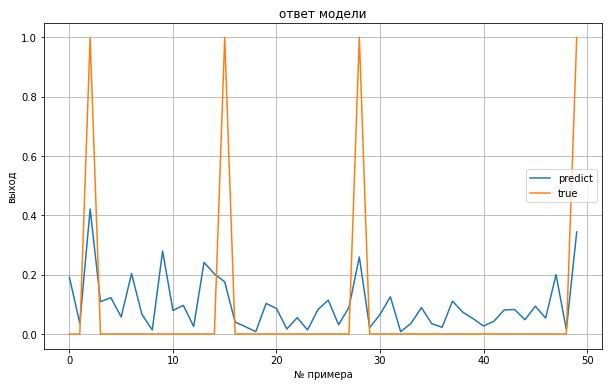

In [52]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds[:n], label='predict')
plt.plot(y_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

In [53]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)

fscore = fscore[ix].round(3)
precision = precision[ix].round(3)
recall = recall[ix].round(3)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore}, Precision={precision}, Recall={recall}')                                                                        

Best Threshold=0.2558490897918844, F-Score=0.695, Precision=0.659, Recall=0.735


In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1662   93]
 [  66  179]]


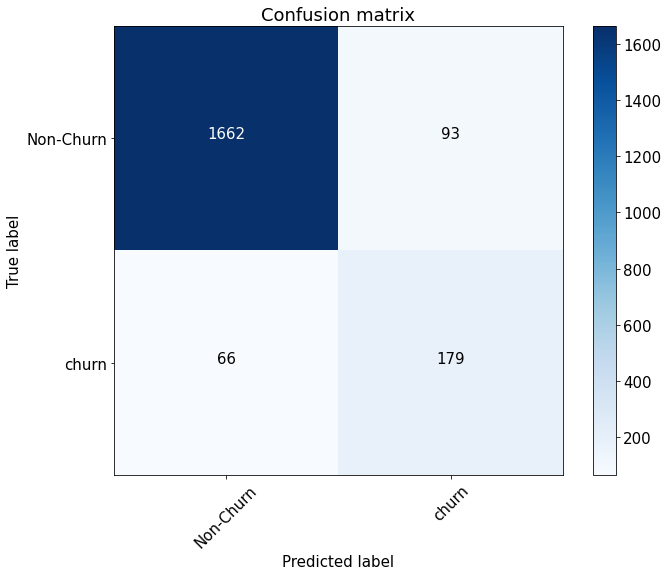

In [55]:
import itertools
# мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds > thresholds[ix])

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [56]:
roc_mean = roc_auc_score(y_test, preds)
roc_mean

0.951843711843712

## Домашнее задание

1. *Самостоятельно повторить tfidf (документация https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
2. Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог)
3. Повторить п.2, но используя уже не медиану, а max
4. *Воспользовавшись полученными знаниями из п.1, повторить пункт 2, но уже взвешивая новости по tfidf (взяв список новостей пользователя)
    - подсказка 1: нужно получить веса-коэффициенты для каждого документа. Не все документы одинаково информативны и несут какой-то положительный сигнал
    - подсказка 2: нужен именно idf, как вес.
5. Сформировать на выходе единую таблицу, сравнивающую качество 2/3 разных метода получения эмбедингов пользователей: median, max, idf_mean по метрикам roc_auc, precision, recall, f_score
6. Сделать самостоятельные выводы и предположения о том, почему тот или ной способ оказался эффективнее остальных

------------------------------------

2.Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог)

In [57]:
def get_user_embedding_median(user_articles_list, doc_dict):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    # print(user_vector)
    user_vector = np.median(user_vector, 0)  # можно не среднее
    return user_vector

In [58]:
user_articles_list = users['articles'].iloc[33]

get_user_embedding_median(user_articles_list, doc_dict)

array([0.        , 0.27176179, 0.        , 0.00844902, 0.06391918,
       0.        , 0.        , 0.        , 0.05306601, 0.        ,
       0.        , 0.14308052, 0.        , 0.01478343, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [59]:
%%time
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding_median(x, doc_dict))])
user_embeddings.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings.head(3)

CPU times: user 651 ms, sys: 17.2 ms, total: 668 ms
Wall time: 679 ms


In [60]:
X = pd.merge(user_embeddings, target, 'left')


In [61]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[[f'topic_{i}' for i in range(N_topic)]], 
                                                    X['churn'], random_state=0)

In [62]:
logreg = LogisticRegression()
# обучим 
logreg.fit(X_train, y_train)

LogisticRegression()

In [63]:
# наши прогнозы для тестовой выборки
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.0830469 , 0.02505577, 0.61908219, 0.22347914, 0.08041034,
       0.06037122, 0.08331638, 0.04165402, 0.02453509, 0.28715178])

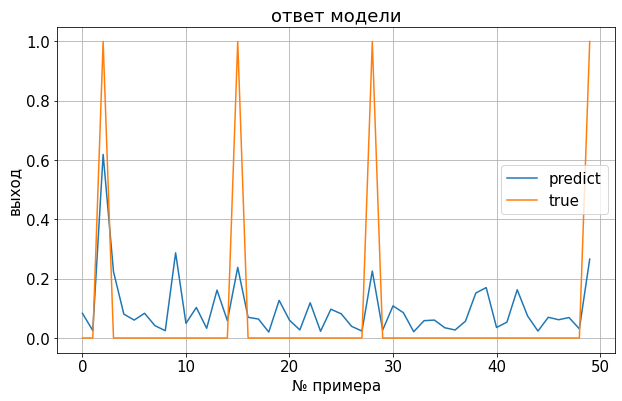

In [64]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds[:n], label='predict')
plt.plot(y_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

In [65]:
precision_median, recall_median, thresholds_median = precision_recall_curve(y_test, preds)
fscore_median = (2 * precision_median * recall_median) / (precision_median + recall_median)
# locate the index of the largest f score
ix = np.argmax(fscore_median)
fscore_median = fscore_median[ix].round(3)
precision_median = precision_median[ix].round(3)
recall_median = recall_median[ix].round(3)
print(f'Best Threshold_median={thresholds[ix]}, F-Score_median={fscore_median}, Precision_median={precision_median}, Recall_median={recall_median}') 

Best Threshold_median=0.14113859253232464, F-Score_median=0.8, Precision_median=0.784, Recall_median=0.816


In [66]:
roc_median = roc_auc_score(y_test, preds)
roc_median

0.9777382405953834

Confusion matrix, without normalization
[[1446  309]
 [   4  241]]


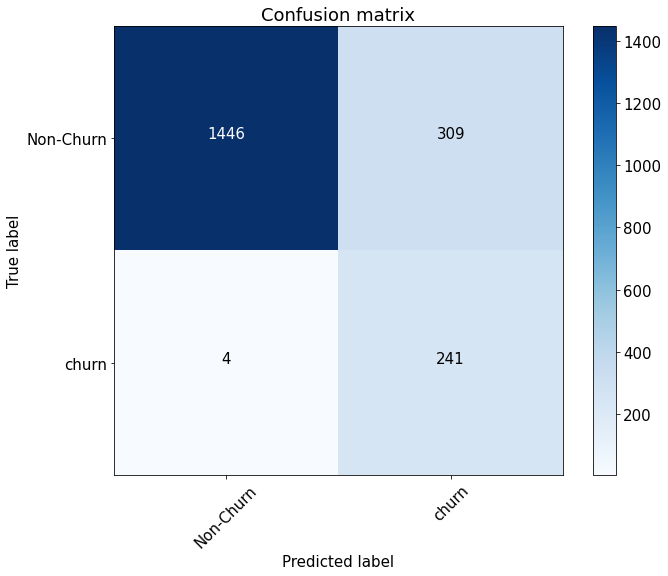

In [67]:
import itertools
# мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds > thresholds[ix])

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [68]:
def get_user_embedding_max(user_articles_list, doc_dict):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    # print(user_vector)
    user_vector = np.max(user_vector, 0)  # можно не среднее
    return user_vector

In [69]:
user_articles_list = users['articles'].iloc[33]

get_user_embedding_max(user_articles_list, doc_dict)

array([0.20891817, 0.47871014, 0.        , 0.10881694, 0.37204477,
       0.543984  , 0.09672374, 0.05624603, 0.09887992, 0.0390451 ,
       0.09315921, 0.34559384, 0.01290833, 0.13255896, 0.3983354 ,
       0.        , 0.03424126, 0.01120594, 0.48958448, 0.01217185])

In [70]:
%%time
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding_max(x, doc_dict))])
user_embeddings.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings.head(3)

CPU times: user 273 ms, sys: 8.26 ms, total: 281 ms
Wall time: 278 ms


In [71]:
X = pd.merge(user_embeddings, target, 'left')

In [72]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[[f'topic_{i}' for i in range(N_topic)]], 
                                                    X['churn'], random_state=0)

In [73]:
logreg = LogisticRegression()
# обучим 
logreg.fit(X_train, y_train)

LogisticRegression()

In [74]:
# наши прогнозы для тестовой выборки
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.09794555, 0.03111429, 0.7624059 , 0.01633059, 0.1173415 ,
       0.0174791 , 0.20503199, 0.02645024, 0.0038087 , 0.23027018])

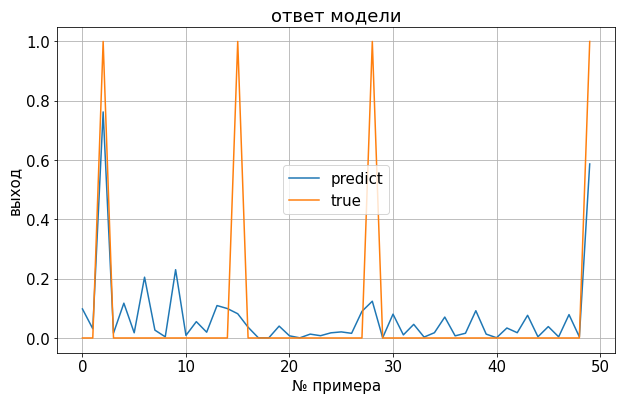

In [75]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds[:n], label='predict')
plt.plot(y_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

In [80]:
precision_max, recall_max, thresholds_max = precision_recall_curve(y_test, preds)
fscore_max = (2 * precision_max * recall_max) / (precision_max + recall_max)
# locate the index of the largest f score
ix = np.argmax(fscore_max)
fscore_max = fscore_max[ix].round(3)
precision_max = precision_max[ix].round(3)
recall_max = recall_max[ix].round(3)

print(f'Best Threshold_max={thresholds[ix]}, F-Score_max={fscore_max}, Precision_max={precision_max}, Recall_max={recall_max}') 

Best Threshold_max=0.1484977810341859, F-Score_max=0.752, Precision_max=0.675, Recall_max=0.849


In [77]:
roc_max = roc_auc_score(y_test, preds)
roc_max

0.9702540845397988

Confusion matrix, without normalization
[[1503  252]
 [  11  234]]


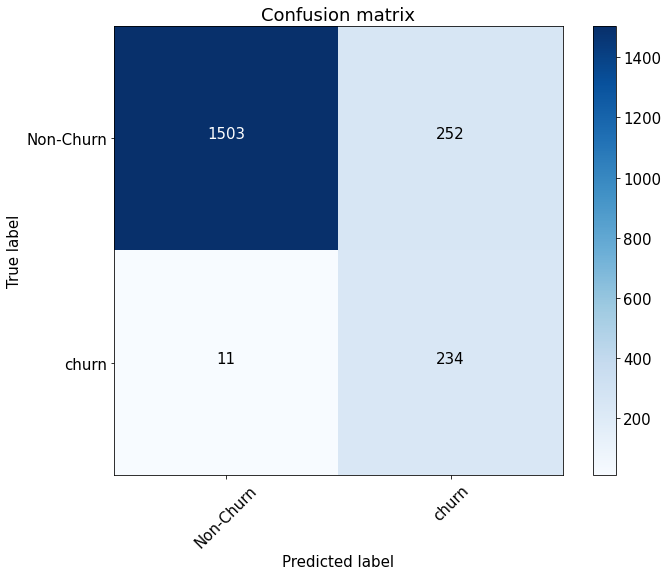

In [78]:
import itertools
# мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds > thresholds[ix])

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [81]:

tabl = pd.DataFrame([['median',fscore_median, precision_median, recall_median, roc_median], ['max',fscore_max, precision_max, recall_max,roc_max], ['mean',fscore, precision,recall,roc_mean]], columns= ['method','f-score', 'presision','recall','roc_auc'])
tabl

,method,f-score,presision,recall,roc_auc
0,median,0.800,0.784,0.816,0.977738
1,max,0.752,0.675,0.849,0.970254
2,mean,0.695,0.659,0.735,0.951844


Лучшие метрики получились у модели с выборкой по медиане. Предполагаю, что медиана отражает типовые интересы читателя. То есть то, что он привык читать. Если мы будем использовать максимум, то туда возможно попадут горячие на какой-то момент темы, которые читатель прочитает, но вернется к типовым. А на среднее могут влиять как раз-таки выбросы тех тем, которые читатель в общем-то и не читает, но из-за интересного заголовка,может кликнуть

## Дополнительные ссылки

1. http://www.machinelearning.ru/wiki/images/d/d5/Voron17survey-artm.pdf
2. https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation
3. http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/